<a href="https://colab.research.google.com/github/oouyang/learn_colab/blob/master/Data_Science_in_Action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 1

> The sexiest job in the 21st centry is data scientist.
 
 Harvard Business Review

## Part 1 如何獲資料



## Chapter 2 載入常見檔案格式


### CSV

pandas read_csv()

In [4]:
import pandas as pd

csv_url = 'https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv'
pd.read_csv(csv_url)

,No.,Player,Pos,Ht,Wt,Birth Date,College
0,0,Randy Brown,PG,6-2,190,"May 22, 1968","University of Houston, New Mexico State Univer..."
1,30,Jud Buechler,SF,6-6,220,"June 19, 1968",University of Arizona
2,35,Jason Caffey,PF,6-8,255,"June 12, 1973",University of Alabama
3,53,James Edwards,C,7-0,225,"November 22, 1955",University of Washington
4,54,Jack Haley,C,6-10,240,"January 27, 1964","University of California, Los Angeles"
5,9,Ron Harper,PG,6-6,185,"January 20, 1964",Miami University
6,23,Michael Jordan,SG,6-6,195,"February 17, 1963",University of North Carolina
7,25,Steve Kerr,PG,6-3,175,"September 27, 1965",University of Arizona
8,7,Toni Kukoc,SF,6-10,192,"September 18, 1968",NaN
9,13,Luc Longley,C,7-2,265,"January 19, 1969",University of New Mexico


* sep : 預設是逗號 (comma) 分隔
* header : 沒有時以 header=None 指派
* name: 指派變數名稱 list
* skiprows: 略過列數
* skipfooter: 略過下方列數
* nrows: 讀入列數
* na_values: 要視為空值的字元

In [5]:
pd.read_csv( csv_url, header=None, skiprows = 1,
             names = ['number','player','pos','ht',
                      'wt','birth_date','college'])

,number,player,pos,ht,wt,birth_date,college
0,0,Randy Brown,PG,6-2,190,"May 22, 1968","University of Houston, New Mexico State Univer..."
1,30,Jud Buechler,SF,6-6,220,"June 19, 1968",University of Arizona
2,35,Jason Caffey,PF,6-8,255,"June 12, 1973",University of Alabama
3,53,James Edwards,C,7-0,225,"November 22, 1955",University of Washington
4,54,Jack Haley,C,6-10,240,"January 27, 1964","University of California, Los Angeles"
5,9,Ron Harper,PG,6-6,185,"January 20, 1964",Miami University
6,23,Michael Jordan,SG,6-6,195,"February 17, 1963",University of North Carolina
7,25,Steve Kerr,PG,6-3,175,"September 27, 1965",University of Arizona
8,7,Toni Kukoc,SF,6-10,192,"September 18, 1968",NaN
9,13,Luc Longley,C,7-2,265,"January 19, 1969",University of New Mexico


### txt

pandas read_table()

In [6]:
import pandas as pd
txt_url = 'https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.txt'
pd.read_table(txt_url, sep=";")

,No.,Player,Pos,Ht,Wt,Birth Date,College
0,0,Randy Brown,PG,6-2,190,May 22; 1968,University of Houston; New Mexico State Univer...
1,30,Jud Buechler,SF,6-6,220,June 19; 1968,University of Arizona
2,35,Jason Caffey,PF,6-8,255,June 12; 1973,University of Alabama
3,53,James Edwards,C,7-0,225,November 22; 1955,University of Washington
4,54,Jack Haley,C,6-10,240,January 27; 1964,University of California; Los Angeles
5,9,Ron Harper,PG,6-6,185,January 20; 1964,Miami University
6,23,Michael Jordan,SG,6-6,195,February 17; 1963,University of North Carolina
7,25,Steve Kerr,PG,6-3,175,September 27; 1965,University of Arizona
8,7,Toni Kukoc,SF,6-10,192,September 18; 1968,NaN
9,13,Luc Longley,C,7-2,265,January 19; 1969,University of New Mexico


### excel

pandas read_excel()

In [7]:
import pandas as pd

xlsx_url = 'https://storage.googleapis.com/ds_data_import/fav_nba_teams.xlsx'
pd.read_excel(xlsx_url)

,No.,Player,Pos,Ht,Wt,Birth Date,College
0,0,Randy Brown,PG,6-2,190,"May 22, 1968","University of Houston, New Mexico State Univer..."
1,30,Jud Buechler,SF,6-6,220,"June 19, 1968",University of Arizona
2,35,Jason Caffey,PF,6-8,255,"June 12, 1973",University of Alabama
3,53,James Edwards,C,7-0,225,"November 22, 1955",University of Washington
4,54,Jack Haley,C,6-10,240,"January 27, 1964","University of California, Los Angeles"
5,9,Ron Harper,PG,6-6,185,"January 20, 1964",Miami University
6,23,Michael Jordan,SG,6-6,195,"February 17, 1963",University of North Carolina
7,25,Steve Kerr,PG,6-3,175,"September 27, 1965",University of Arizona
8,7,Toni Kukoc,SF,6-10,192,"September 18, 1968",NaN
9,13,Luc Longley,C,7-2,265,"January 19, 1969",University of New Mexico


* header: 預設為 0，第一列為變數名, header=None時代表沒有變數名稱
* names: 指定變數名字的 list
* usecols: 要載入的變數
* skiprows: 忽略的列數
* skipfooter: 忽略的下方列數

In [8]:
pd.read_excel(xlsx_url,
    sheet_name='boston_celtics_2007_2008', skiprows=6, header=None,
    names=['number','player','pos'],usecols=[0,1,2])

,number,player,pos
0,5,Kevin Garnett,PF
1,50,Eddie House,PG
2,43,Kendrick Perkins,C
3,34,Paul Pierce,SF
4,66,Scot Pollard,C
5,41,James Posey,PF
6,0,Leon Powe,C
7,13,Gabe Pruitt,PG
8,9,Rajon Rondo,PG
9,44,Brian Scalabrine,PF


### json

requests get()

In [0]:
from requests import get

json_url = 'https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.json'
chicago_bulls_dict = get(json_url).json()


In [10]:
import json

print(json.dumps(chicago_bulls_dict, indent=2))

{
  "team_name": "Chicago Bulls",
  "records": {
    "wins": 72,
    "losses": 10
  },
  "coach": "Phil Jackson",
  "assistant_coach": [
    "Jim Cleamons",
    "John Paxson",
    "Jimmy Rodgers",
    "Tex Winter"
  ],
  "starting_lineups": {
    "PG": "Ron Harper",
    "SG": "Michael Jordan",
    "SF": "Scottie Pippen",
    "PF": "Dennis Rodman",
    "C": "Luc Longley"
  }
}


In [12]:
winning_percentage = chicago_bulls_dict['records']['wins'] / (
    chicago_bulls_dict['records']['wins'] +
    chicago_bulls_dict['records']['losses']
)
fav_player = chicago_bulls_dict['starting_lineups']['SG']

print("勝率為 {:.2f}".format(winning_percentage))
print("最喜歡的球員是 {}".format(fav_player))

勝率為 0.88
最喜歡的球員是 Michael Jordan


## Chapter 資料庫

> The world's most valuable resource is no longeroil, but data

The Economist


### MySQL

> pip install --upgrade sqlalchemy pymysql

* host: 
* port:
* dbname:
* user:
* password:

In [0]:
import pandas as pd
from sqlalchemy import create_engine

csv_url = 'https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv'
chicago_bulls = pd.read_csv(csv_url)

host = "YOURHOST"
port = 3306
dbname = "YOURDBNAME"
user = "YOURUSERNAME"
password = "YOURPASSWORD"

engine = create_engine('mysql+pymsql://{user}:{password}@{host}:{port}/{dbname}'.format(
    user=user, password=passowrd, host=host, port=port, dbname=dbname))

chicago_bulls.to_sql('chicago_bulls', engine, index=False, if_exists='replace')

In [0]:
import pandas as pd
from sqlalchemy import create_engine

host = "YOURHOST"
port = 3306
dbname = "YOURDBNAME"
user = "YOURUSERNAME"
password = "YOURPASSWORD"

engine = create_engine('mysql+pymsql://{user}:{password}@{host}:{port}/{dbname}'.format(
    user=user, password=passowrd, host=host, port=port, dbname=dbname))

chicago_bulls = pd.read_sql_table('chicago_bulls', engine)

In [0]:
import pandas as pd
from sqlalchemy import create_engine

host = "YOURHOST"
port = 3306
dbname = "YOURDBNAME"
user = "YOURUSERNAME"
password = "YOURPASSWORD"

engine = create_engine('mysql+pymsql://{user}:{password}@{host}:{port}/{dbname}'.format(
    user=user, password=passowrd, host=host, port=port, dbname=dbname))

sql_statement = """
SELECT *
FROM chicago_bulls
WHERE Player IN('Michael Jordan', 'Scottie Pippen', 'Dennis Rodman');
"""
chicago_bulls = pd.read_sql_query(sql_statement, engine)

### BigQuery

> pip install pandas-gbq

In [0]:
from google.cloud import bigquery
import pandas as pd
from pandas_gbq import to_gbq

csv_url = 'https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv'
chicago_bulls = pd.read_csv(csv_url, header=None, skiprows=1, 
    names=['number','player','pos','ht','wt','birth_date','college'])

In [0]:
to_gbq(chicago_bulls, destination_table='fav_nba_teams.chicago_bulls',
       project_id='YOURPROJECTID', if_exists='replace',
       private_key='YOURSERCICEACCOUNT')

In [0]:
from pandas_gbq import read_gbq

project_id = 'YOURPROJECTID'
private_key = 'YOURSERVICEACCOUNT'
sql_statement = 'SELECT * FROM fav_nba_teams.chicago_bulls;'
chicago_bulls = read_gbq(sql_statement, project_id=project_id,
                         private_key=private_key)

### Firebase

> pip install firebase_admin

In [0]:
import firebase_admin
from firebase_admin import credentials

In [0]:
cred = credentials.Certificate('PATHTOYOURSERVICEACCOUNT')
firebase_admin.initialize_app(crep, {
    'databaseURL' : 'YOURDATABASEURL'
})


In [0]:
from firebase_admin import db
from requests import get

In [0]:
json_url = 'https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.json'
chicago_bulls_dict = get(json_url).json()


In [0]:
root = db.reference()
root.child('chicago_bulls').push(chicago_bulls_dict)

In [0]:
from firebase_admin import db

ref = db.reference('chicago_bulls')
chicago_bulls = ref.get()

## Chapter 4 static web content

* html tag
* html id
* html class
* css selector
* xpath

chrome extentsions
* Selector Gadget 
* XPath Helper

> pip install pyquery

In [20]:
!pip install pyquery

In [0]:
from pyquery import PyQuery as pq

In [0]:
def get_movie_rating(movie_url):
  rating_css = 'strong span'

  movie_doc = pq(movie_url)
  rating_elem = movie_doc(rating_css)
  movie_rating = float(rating_elem.text())

  return movie_rating

In [0]:
def get_movie_genre(movie_url):
  genre_css = '.subtext a'

  movie_doc = pq(movie_url)
  genre_elem = movie_doc(genre_css)
  movie_genre = [x.text.replace("\n","").strip() for x in genre_elem]
  movie_genre.pop

  return movie_genre

In [25]:
avenger_url = 'https://www.imdb.com/title/tt4154756'
get_movie_rating(avenger_url)

8.5

In [30]:
get_movie_genre(avenger_url)

['Action', 'Adventure', 'Sci-Fi', '27 April 2018 (USA)']

In [0]:
def get_movie_cast(movie_url):
  cast_css = '.primary_photo+ td a'

  movie_doc = pq(movie_url)
  cast_elem = movie_doc(cast_css)
  cast_genre = [x.text.replace("\n", "").strip() for x in cast_elem]

  return cast_genre

In [32]:
get_movie_cast(avenger_url)

['Robert Downey Jr.',
 'Chris Hemsworth',
 'Mark Ruffalo',
 'Chris Evans',
 'Scarlett Johansson',
 'Don Cheadle',
 'Benedict Cumberbatch',
 'Tom Holland',
 'Chadwick Boseman',
 'Zoe Saldana',
 'Karen Gillan',
 'Tom Hiddleston',
 'Paul Bettany',
 'Elizabeth Olsen',
 'Anthony Mackie']

In [0]:
def get_movie_poster(movie_url):
  poster_css = '.poster img'

  movie_doc = pq(movie_url)
  poster_elem = movie_doc(poster_css)
  poster = poster_elem.attr('src')

  return poster

In [36]:
get_movie_poster(avenger_url)

'https://m.media-amazon.com/images/M/MV5BMjMxNjY2MDU1OV5BMl5BanBnXkFtZTgwNzY1MTUwNTM@._V1_UX182_CR0,0,182,268_AL_.jpg'

## Chapter 5 dynamic web content

In [0]:
from pyquery import PyQuery as pq

def get_movie_info(movie_url):
  rating_css = 'strong span'
  genre_css = '.subtext a'
  poster_css = '.poster img'
  cast_css = '.primary_photo+ td a'

  movie_doc = pq(movie_url)

  rating_elem = movie_doc(rating_css)
  movie_rating = float(rating_elem.text())

  genre_elem = movie_doc(genre_css)
  movie_genre = [x.text.replace("\n","").strip() for x in genre_elem]
  movie_genre.pop()

  movie_poster_elem = movie_doc(poster_css)
  movie_poster = movie_poster_elem.attr('src')

  movie_cast_elem = movie_doc(cast_css)
  movie_cast = [x.text.replace("\n", "").strip() for x in movie_cast_elem]

  movie_info = {
      'rating': movie_rating,
      'genre': movie_genre,
      'poster': movie_poster,
      'cast': movie_cast
  }

  return movie_info

In [42]:
avenger_url = 'https://www.imdb.com/title/tt4154756'
get_movie_info(avenger_url)

{'cast': ['Robert Downey Jr.',
  'Chris Hemsworth',
  'Mark Ruffalo',
  'Chris Evans',
  'Scarlett Johansson',
  'Don Cheadle',
  'Benedict Cumberbatch',
  'Tom Holland',
  'Chadwick Boseman',
  'Zoe Saldana',
  'Karen Gillan',
  'Tom Hiddleston',
  'Paul Bettany',
  'Elizabeth Olsen',
  'Anthony Mackie'],
 'genre': ['Action', 'Adventure', 'Sci-Fi'],
 'poster': 'https://m.media-amazon.com/images/M/MV5BMjMxNjY2MDU1OV5BMl5BanBnXkFtZTgwNzY1MTUwNTM@._V1_UX182_CR0,0,182,268_AL_.jpg',
 'rating': 8.5}

### Selenium

> pip install selenium

In [44]:
!pip install selenium

     |████████████████████████████████| 911kB 3.5MB/s 


In [0]:
from selenium import webdriver

In [0]:
imdb_home = 'https://www.imdb.com'
driver = webdriver.Chrome(executable_path="YOURCHROMEDRIVERPATH")
driver.get(imdb_home)
print(driver.current_url)
driver.close()

* driver.get()
* driver.find_element_by_xpath()
* driver.find_element_by_css_selector()
* driver.current_url
* elem.send_keys()
* elem.click()

In [0]:
from selenium import webdriver
from random import randint
import time
from pyquery import PyQuery as pq

In [0]:
def get_movies(*args):

  imdb_home = 'https://www.imdb.com'
  driver = webdriver.Firefox(executable_path='YOURGECKODRIVERPATH')

  movies = dict()
  for movie_title in args:

    driver.get(imdb_home)
    search_elem = driver.find_element_by_css_selector("#navbar-query")
    search_elem.send_keys(movie_title)
    submit_elem = driver.find_element_by-css_selector("#navbar-submit-button .navbarSprite")
    submit_elem.click()

    first_result_elem = driver.find_element_by_css_selector("#findSubHeader+ .findSection .odd:nth-child(1) .result_text a")
    first_result_elem.click()

    current_url = driver.current_url

    movie_info = get_movie_info(current_url)
    movies[movie_title] = movie_info
    time.sleep(randint(3, 8))

  driver.close()

  return movies

  

In [4]:
movies = get_movies("Avengers: Infinity War", "Black Panther")
print(movies["Avengers: Infinity War"])
print(movies["Black Panther"])

NameError: ignored

## Chapter 6 Data

### array

* element-wise operation
* slicing
* filter
* single type

> pip install numpy

In [1]:
import numpy as np

arr = np.array([11,12,13,14,15])
print(arr)
print(type(arr))

[11 12 13 14 15]
<class 'numpy.ndarray'>


In [2]:
print(arr[0])
print(arr[-1])

11
15


In [3]:
print(arr[[0,1,4]])

[11 12 15]


In [5]:
arr = np.array([11,12,13,14,15])
arr[2] = 87
print(arr)

[11 12 87 14 15]


In [6]:
arr = np.array([11,12,13,14,15])
arr = np.append(arr, 87)
arr = np.insert(arr, 1, 99)

print(arr)

[11 99 12 13 14 15 87]


In [7]:
arr = np.array([11,12,13,14,15])
arr = np.delete(arr, 2)
print(arr)

[11 12 14 15]


In [8]:
arr = np.array([11,12,13,14,15])
print(arr + 2)
print(arr - 2)
print(arr * 2)
print(arr / 2)

[13 14 15 16 17]
[ 9 10 11 12 13]
[22 24 26 28 30]
[5.5 6.  6.5 7.  7.5]


In [9]:
print(arr ** 3)
print(arr % 2)
print(arr // 2)
print(arr + arr)
print(arr * arr)

[1331 1728 2197 2744 3375]
[1 0 1 0 1]
[5 6 6 7 7]
[22 24 26 28 30]
[121 144 169 196 225]


In [10]:
arr = np.array([11,12,13,14,15])
is_even = arr % 2 == 0
print(is_even)
print(arr[is_even])

[False  True False  True False]
[12 14]


### vector, matrix and tensor

In [11]:
vec = np.array([11,12,13,14,15]).reshape(5,1)
print(vec)
print(vec.shape)

[[11]
 [12]
 [13]
 [14]
 [15]]
(5, 1)


In [12]:
mat = np.arange(11,21).reshape(2,5)
print(mat)
print(mat.shape)

[[11 12 13 14 15]
 [16 17 18 19 20]]
(2, 5)


In [13]:
tensor = np.arange(11,35).reshape(2,3,4)
print(tensor)
print(tensor.shape)

[[[11 12 13 14]
  [15 16 17 18]
  [19 20 21 22]]

 [[23 24 25 26]
  [27 28 29 30]
  [31 32 33 34]]]
(2, 3, 4)


filter => vec, mat, and tensor failback to array

In [15]:
vec = np.array([11,12,13,14,15]).reshape(5,1)
mat = np.arange(11,21).reshape(2,5)
tensor = np.arange(11,35).reshape(2,3,4)

print(vec[vec % 2 == 0])
print(mat[mat % 2 == 0])
print(tensor[tensor % 2 == 0])

[12 14]
[12 14 16 18 20]
[12 14 16 18 20 22 24 26 28 30 32 34]


### dataframe

In [16]:
import pandas as pd

numbers = [9, 23, 33, 91, 13]
players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley"]

df = pd.DataFrame()
df["number"] = numbers
df["player"] = players
df

,number,player
0,9,Ron Harper
1,23,Michael Jordan
2,33,Scottie Pippen
3,91,Dennis Rodman
4,13,Luc Longley


In [17]:
numbers = [9, 23, 33, 91, 13]
players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley"]

df = pd.DataFrame()
df["number"] = numbers
df["player"] = players

print(df["player"])
print(type(df["player"]))
print(df["player"].values)

0        Ron Harper
1    Michael Jordan
2    Scottie Pippen
3     Dennis Rodman
4       Luc Longley
Name: player, dtype: object
<class 'pandas.core.series.Series'>
['Ron Harper' 'Michael Jordan' 'Scottie Pippen' 'Dennis Rodman'
 'Luc Longley']


In [18]:
numbers = [9, 23, 33, 91, 13]
players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley"]

df = pd.DataFrame()
df["number"] = numbers
df["player"] = players

mj = df.iloc[1,1]
print(mj)

Michael Jordan


In [19]:
numbers = [9, 23, 33, 91, 13]
players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley"]

df = pd.DataFrame()
df["number"] = numbers
df["player"] = players

trio = df["number"].isin([23,33,91])
print(trio)
df[trio]

0    False
1     True
2     True
3     True
4    False
Name: number, dtype: bool


,number,player
1,23,Michael Jordan
2,33,Scottie Pippen
3,91,Dennis Rodman


### list

In [21]:
team_name = "Chicago Bulls"
season = "1995-96"
records = {
    "wins": 72,
    "losses": 10
}
coach = "Phil Jackson"
assistant_coach = ["Jim Cleamons","JohnPaxson", "Jimmy Rodgers", "Tex Winter"]
starting_lineups = {
    "PG": "Ron Harper",
    "SG": "Michael Jordan",
    "SF": "Scottie Pippen", 
    "PF": "Dennis Rodman",
    "C": "Luc Longley"
}

cb_list = [team_name, season, records, coach, assistant_coach, starting_lineups
          ]

cb_dict = {
    "team_name": team_name,
    "season": season,
    "records": records,
    "coach": coach,
    "assiant_coach": assistant_coach,
    "starting_lineups": starting_lineups
}        
print(type(cb_list))
print(type(cb_dict))

<class 'list'>
<class 'dict'>


In [24]:
is_champion = True
cb_list.append(is_champion)
cb_dict["is_champion"] = is_champion
print(cb_list[-1])
print(cb_dict["is_champion"])

True
True


In [25]:
new_records = {
    "wins": 72,
    "losses": 10,
    "winning_percent": "{0:.2f}%".format(72/82*100)
}
cb_list[2] = new_records
cb_dict["records"] = new_records
print(cb_list[2])
print(cb_dict["records"])

{'wins': 72, 'losses': 10, 'winning_percent': '87.80%'}
{'wins': 72, 'losses': 10, 'winning_percent': '87.80%'}


In [27]:
for idx, elem in enumerate(cb_list):
  print("index {} value:".format(idx))
  print(elem)

index 0 value:
Chicago Bulls
index 1 value:
1995-96
index 2 value:
{'wins': 72, 'losses': 10, 'winning_percent': '87.80%'}
index 3 value:
Phil Jackson
index 4 value:
['Jim Cleamons', 'JohnPaxson', 'Jimmy Rodgers', 'Tex Winter']
index 5 value:
{'PG': 'Ron Harper', 'SG': 'Michael Jordan', 'SF': 'Scottie Pippen', 'PF': 'Dennis Rodman', 'C': 'Luc Longley'}
index 6 value:
True


In [28]:
for key, value in cb_dict.items():
  print("key {} value is: ".format(key))
  print(value)

key team_name value is: 
Chicago Bulls
key season value is: 
1995-96
key records value is: 
{'wins': 72, 'losses': 10, 'winning_percent': '87.80%'}
key coach value is: 
Phil Jackson
key assiant_coach value is: 
['Jim Cleamons', 'JohnPaxson', 'Jimmy Rodgers', 'Tex Winter']
key starting_lineups value is: 
{'PG': 'Ron Harper', 'SG': 'Michael Jordan', 'SF': 'Scottie Pippen', 'PF': 'Dennis Rodman', 'C': 'Luc Longley'}
key is_champion value is: 
True


## Chapter 7 basic dataframe operation

data wrangling

data munging

Exploratory Data Analysis - EDA

Tabular Data => DataFrame

### create

In [29]:
numbers = [9, 23, 33, 91, 13]
players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley"]

df = pd.DataFrame()
df["number"] = numbers
df["player"] = players

df

,number,player
0,9,Ron Harper
1,23,Michael Jordan
2,33,Scottie Pippen
3,91,Dennis Rodman
4,13,Luc Longley


In [30]:
csv_url = "https://storage.googleapis.com/learn_pd_like_tidyverse/gapminder.csv"

df = pd.read_csv(csv_url)
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


### view

* df.head()
* df.tail()
* df.info()
* df.describe()
* df.shape()
* df.columns
* df.index

In [31]:
csv_url = "https://storage.googleapis.com/learn_pd_like_tidyverse/gapminder.csv"

df = pd.read_csv(csv_url)

df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [32]:
df.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [34]:
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [36]:
df.shape

(1704, 6)

In [37]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [38]:
df.index

RangeIndex(start=0, stop=1704, step=1)

### filter

* df.loc[m, n]
* df.iloc[m, n]

In [40]:
numbers = [9, 23, 33, 91, 13]
players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley"]

df = pd.DataFrame()
df["number"] = numbers
df["player"] = players
df.index = ["PG","SG","SF","PF","C"]

df

,number,player
PG,9,Ron Harper
SG,23,Michael Jordan
SF,33,Scottie Pippen
PF,91,Dennis Rodman
C,13,Luc Longley


In [42]:
numbers = [9, 23, 33, 91, 13]
players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley"]

df = pd.DataFrame()
df["number"] = numbers
df["player"] = players
df.index = ["PG","SG","SF","PF","C"]

df.loc[["PG","SG","PF"], ["number", "player"]]


,number,player
PG,9,Ron Harper
SG,23,Michael Jordan
PF,91,Dennis Rodman


In [43]:
df.iloc[[1,2,3],[0,1]]

,number,player
SG,23,Michael Jordan
SF,33,Scottie Pippen
PF,91,Dennis Rodman


In [44]:
numbers = [9, 23, 33, 91, 13]
players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley"]

df = pd.DataFrame()
df["number"] = numbers
df["player"] = players
df.index = ["PG","SG","SF","PF","C"]

is_trio = df["number"].isin([23,33,91])
print(is_trio)


PG    False
SG     True
SF     True
PF     True
C     False
Name: number, dtype: bool


In [45]:
df[is_trio]

,number,player
SG,23,Michael Jordan
SF,33,Scottie Pippen
PF,91,Dennis Rodman


In [48]:
is_trio = df["player"].isin(["Michael Jordan", "Scottie Pippen", "Dennis Rodman"])
print(is_trio)
df[is_trio]

PG    False
SG     True
SF     True
PF     True
C     False
Name: player, dtype: bool


,number,player
SG,23,Michael Jordan
SF,33,Scottie Pippen
PF,91,Dennis Rodman


### selection

df.col or df["col"]

df[["col1", "col2"]]

In [49]:
numbers = [9, 23, 33, 91, 13]
players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley"]

df = pd.DataFrame()
df["number"] = numbers
df["player"] = players

print(df["player"])
print(type(df["player"]))
df[["player", "number"]]

0        Ron Harper
1    Michael Jordan
2    Scottie Pippen
3     Dennis Rodman
4       Luc Longley
Name: player, dtype: object
<class 'pandas.core.series.Series'>


,player,number
0,Ron Harper,9
1,Michael Jordan,23
2,Scottie Pippen,33
3,Dennis Rodman,91
4,Luc Longley,13


In [50]:
numbers = [9, 23, 33, 91, 13]
players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley"]

df = pd.DataFrame()
df["number"] = numbers
df["player"] = players

print(df.iloc[:,1])
print(type(df.iloc[:, 1]))


0        Ron Harper
1    Michael Jordan
2    Scottie Pippen
3     Dennis Rodman
4       Luc Longley
Name: player, dtype: object
<class 'pandas.core.series.Series'>


In [51]:
df.iloc[:, [1,0]]

,player,number
0,Ron Harper,9
1,Michael Jordan,23
2,Scottie Pippen,33
3,Dennis Rodman,91
4,Luc Longley,13


### sort

df.sort_index()

df.sort_values()

ascending=False

In [52]:
numbers = [9, 23, 33, 91, 13]
players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley"]

df = pd.DataFrame()
df["number"] = numbers
df["player"] = players
df.index = ["PG","SG","SF","PF","C"]

df.sort_index()

,number,player
C,13,Luc Longley
PF,91,Dennis Rodman
PG,9,Ron Harper
SF,33,Scottie Pippen
SG,23,Michael Jordan


In [53]:
df.sort_index(ascending=False)

,number,player
SG,23,Michael Jordan
SF,33,Scottie Pippen
PG,9,Ron Harper
PF,91,Dennis Rodman
C,13,Luc Longley


In [54]:
csv_url = "https://storage.googleapis.com/learn_pd_like_tidyverse/gapminder.csv"
df = pd.read_csv(csv_url)

df.sort_values(by="year").head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
528,France,Europe,1952,67.410,42459667,7029.809327
540,Gabon,Africa,1952,37.003,420702,4293.476475
1656,West Bank and Gaza,Asia,1952,43.160,1030585,1515.592329
552,Gambia,Africa,1952,30.000,284320,485.230659


In [55]:
df.sort_values(by="year", ascending=False).head()

,country,continent,year,lifeExp,pop,gdpPercap
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298
491,Equatorial Guinea,Africa,2007,51.579,551201,12154.089750
515,Ethiopia,Africa,2007,52.947,76511887,690.805576
527,Finland,Europe,2007,79.313,5238460,33207.084400
539,France,Europe,2007,80.657,61083916,30470.016700


In [56]:
df.sort_values(by=["year","continent"],ascending=[True,False]).head()

,country,continent,year,lifeExp,pop,gdpPercap
60,Australia,Oceania,1952,69.12,8691212,10039.595640
1092,New Zealand,Oceania,1952,69.39,1994794,10556.575660
12,Albania,Europe,1952,55.23,1282697,1601.056136
72,Austria,Europe,1952,66.80,6927772,6137.076492
108,Belgium,Europe,1952,68.00,8730405,8343.105127


### New column

* 衍生變數
* 非衍生變數

In [57]:
numbers = [9, 23, 33, 91, 13]
players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley"]

df = pd.DataFrame()
df["number"] = numbers
df["player"] = players

df["last_name"] = df["player"].map(lambda x: x.split()[1])
df

,number,player,last_name
0,9,Ron Harper,Harper
1,23,Michael Jordan,Jordan
2,33,Scottie Pippen,Pippen
3,91,Dennis Rodman,Rodman
4,13,Luc Longley,Longley


In [58]:
numbers = [9, 23, 33, 91, 13]
players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley"]

df = pd.DataFrame()
df["number"] = numbers
df["player"] = players
df["team"] = "Chicago Bulls"
df["height"] = ["6-6","6-6","6-8","6-7","7-2"]

df

,number,player,team,height
0,9,Ron Harper,Chicago Bulls,6-6
1,23,Michael Jordan,Chicago Bulls,6-6
2,33,Scottie Pippen,Chicago Bulls,6-8
3,91,Dennis Rodman,Chicago Bulls,6-7
4,13,Luc Longley,Chicago Bulls,7-2


### New row

In [60]:
numbers = [9, 23, 33, 91, 13]
players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley"]

df = pd.DataFrame()
df["number"] = numbers
df["player"] = players

toni_kukoc = pd.DataFrame()
toni_kukoc["number"] = [7]
toni_kukoc["player"] = ["Toni Kukoc"]

df = df.append(toni_kukoc)
df = df.reset_index(drop=True)

df

,number,player
0,9,Ron Harper
1,23,Michael Jordan
2,33,Scottie Pippen
3,91,Dennis Rodman
4,13,Luc Longley
5,7,Toni Kukoc


### summary

In [61]:
csv_url = "https://storage.googleapis.com/learn_pd_like_tidyverse/gapminder.csv"
df = pd.read_csv(csv_url)

df[df.year==2007]["pop"].sum()

6251013179

### group


In [11]:
import pandas as pd

csv_url = "https://storage.googleapis.com/learn_pd_like_tidyverse/gapminder.csv"
df = pd.read_csv(csv_url)

grouped = df[df.year == 2007].groupby("continent")
grouped["pop"].sum()

continent
Africa       929539692
Americas     898871184
Asia        3811953827
Europe       586098529
Oceania       24549947
Name: pop, dtype: int64

In [14]:
grouped = df.groupby(["year", "continent"])
grouped["pop"].sum().tail(n = 10)

year  continent
2002  Africa        833723916
      Americas      849772762
      Asia         3601802203
      Europe        578223869
      Oceania        23454829
2007  Africa        929539692
      Americas      898871184
      Asia         3811953827
      Europe        586098529
      Oceania        24549947
Name: pop, dtype: int64

## Chapter 8 Adavance data operation

### adjust type

In [15]:
import pandas as pd

numbers = [9, 23, 33, 91, 13]
players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley"]

df = pd.DataFrame()
df["number"] = numbers
df["player"] = players

print(df['number'].dtype)
print(df['number'].values)

int64
[ 9 23 33 91 13]


In [16]:
df["number"] = df["number"].astype(str)
print(df['number'].dtype)
print(df['number'].values)

object
['9' '23' '33' '91' '13']


### map

In [17]:

numbers = [9, 23, 33, 91, 13]
players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley"]

df = pd.DataFrame()
df["number"] = numbers
df["player"] = players

position_dict = {
    "Ron Harper": "PG",
    "Michael Jordan": "SG",
    "Scottie Pippen": "SF",
    "Dennis Rodman": "PF",
    "Luc Longley": "C"
}

df["position"] = df["player"].map(position_dict)
df

,number,player,position
0,9,Ron Harper,PG
1,23,Michael Jordan,SG
2,33,Scottie Pippen,SF
3,91,Dennis Rodman,PF
4,13,Luc Longley,C


In [18]:
court_dict = {
    "PG": "Back",
    "SG": "Back",
    "SF": "Front",
    "PF": "Front",
    "C": "Front"
}
df["court"] = df["position"].map(court_dict)
df

,number,player,position,court
0,9,Ron Harper,PG,Back
1,23,Michael Jordan,SG,Back
2,33,Scottie Pippen,SF,Front
3,91,Dennis Rodman,PF,Front
4,13,Luc Longley,C,Front


In [19]:
numbers = [9, 23, 33, 91, 13]
players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley"]

df = pd.DataFrame()
df["number"] = numbers
df["player"] = players

position_dict = {
    "Ron Harper": "PG",
    "Michael Jordan": "SG",
    "Scottie Pippen": "SF",
    "Dennis Rodman": "PF",
    "Luc Longley": "C"
}

df["position"] = df["player"].map(position_dict)
df["court"] = df["position"].map(lambda x: "Back" if x in ['PG', 'SG'] else "Front")
df

,number,player,position,court
0,9,Ron Harper,PG,Back
1,23,Michael Jordan,SG,Back
2,33,Scottie Pippen,SF,Front
3,91,Dennis Rodman,PF,Front
4,13,Luc Longley,C,Front


### number map to text

In [21]:
numbers = [9, 23, 33, 91, 13]
players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley"]
weights = [185, 195, 210, 210, 265]

df = pd.DataFrame()
df["number"] = numbers
df["player"] = players
df["weight"] = weights

def get_weight_category(wt):
  if wt < 200:
    return "Light"
  elif 200 <= wt < 250:
    return "Medium"
  else:
    return "Heavy"

df["weight_category"] = df["weight"].map(get_weight_category)
df

,number,player,weight,weight_category
0,9,Ron Harper,185,Light
1,23,Michael Jordan,195,Light
2,33,Scottie Pippen,210,Medium
3,91,Dennis Rodman,210,Medium
4,13,Luc Longley,265,Heavy


### set default value

* None or nan

In [23]:
numbers = [9, 23, 33, 91, 13, 7]
players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley", "Toni Kukoc"]
colleges = ["Miami University", "University of North Carolina", "University of Central Arkansas", "Southeastern Oklahoma State University", "University of New Mexico", None]

df = pd.DataFrame()
df["number"] = numbers
df["player"] = players
df["college"] = colleges

df

,number,player,college
0,9,Ron Harper,Miami University
1,23,Michael Jordan,University of North Carolina
2,33,Scottie Pippen,University of Central Arkansas
3,91,Dennis Rodman,Southeastern Oklahoma State University
4,13,Luc Longley,University of New Mexico
5,7,Toni Kukoc,None


In [24]:
numbers = [9, 23, 33, 91, 13, 7]
players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley", "Toni Kukoc"]
colleges = ["Miami University", "University of North Carolina", "University of Central Arkansas", "Southeastern Oklahoma State University", "University of New Mexico", None]

df = pd.DataFrame()
df["number"] = numbers
df["player"] = players
df["college"] = colleges

print(df["college"].isna())
df[df["college"].isna()]

0    False
1    False
2    False
3    False
4    False
5     True
Name: college, dtype: bool


,number,player,college
5,7,Toni Kukoc,None


In [25]:
print(df["college"].notna())
df[df["college"].notna()]

0     True
1     True
2     True
3     True
4     True
5    False
Name: college, dtype: bool


,number,player,college
0,9,Ron Harper,Miami University
1,23,Michael Jordan,University of North Carolina
2,33,Scottie Pippen,University of Central Arkansas
3,91,Dennis Rodman,Southeastern Oklahoma State University
4,13,Luc Longley,University of New Mexico


In [26]:
df["college"] = df["college"].fillna("Croatia")
df

,number,player,college
0,9,Ron Harper,Miami University
1,23,Michael Jordan,University of North Carolina
2,33,Scottie Pippen,University of Central Arkansas
3,91,Dennis Rodman,Southeastern Oklahoma State University
4,13,Luc Longley,University of New Mexico
5,7,Toni Kukoc,Croatia


In [27]:
numbers = [9, 23, 33, 91, 13]
players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley"]
birth_dates = ["January 20, 1964","February 17, 1963","September 25, 1965","May 13, 1961","January 19, 1969"]
df = pd.DataFrame()
df["number"] = numbers
df["player"] = players
df["birth_date"] = birth_dates

print(df["birth_date"].dtype)
df

object


,number,player,birth_date
0,9,Ron Harper,"January 20, 1964"
1,23,Michael Jordan,"February 17, 1963"
2,33,Scottie Pippen,"September 25, 1965"
3,91,Dennis Rodman,"May 13, 1961"
4,13,Luc Longley,"January 19, 1969"


In [29]:
df["birth_date"] = pd.to_datetime(df["birth_date"])

print(df["birth_date"].dtype)
df

datetime64[ns]


,number,player,birth_date
0,9,Ron Harper,1964-01-20
1,23,Michael Jordan,1963-02-17
2,33,Scottie Pippen,1965-09-25
3,91,Dennis Rodman,1961-05-13
4,13,Luc Longley,1969-01-19


In [30]:
df.sort_values("birth_date")

,number,player,birth_date
3,91,Dennis Rodman,1961-05-13
1,23,Michael Jordan,1963-02-17
0,9,Ron Harper,1964-01-20
2,33,Scottie Pippen,1965-09-25
4,13,Luc Longley,1969-01-19


In [31]:
df = df.set_index("birth_date", drop=True)
df

,number,player
birth_date,,
1964-01-20,9,Ron Harper
1963-02-17,23,Michael Jordan
1965-09-25,33,Scottie Pippen
1961-05-13,91,Dennis Rodman
1969-01-19,13,Luc Longley


### wide format and long format

In [34]:

players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley"]
weights = [185, 195, 210, 210, 265]
heights = ["6-6","6-6","6-8","6-7","7-2"]

df = pd.DataFrame()
df["player"] = players
df["height"] = heights
df["weight"] = weights

df = df.set_index("player", drop=True)
df

,height,weight
player,,
Ron Harper,6-6,185
Michael Jordan,6-6,195
Scottie Pippen,6-8,210
Dennis Rodman,6-7,210
Luc Longley,7-2,265


In [35]:
long_format = df.stack()
long_format

player                
Ron Harper      height    6-6
                weight    185
Michael Jordan  height    6-6
                weight    195
Scottie Pippen  height    6-8
                weight    210
Dennis Rodman   height    6-7
                weight    210
Luc Longley     height    7-2
                weight    265
dtype: object

### merge dateframe

In [36]:
numbers = [9, 23, 33, 91, 13, 7]
players = ["Ron Harper", "Michael Jordan", "Scottie Pippen", "Dennis Rodman", "Luc Longley", "Toni Kukoc"]
colleges = ["Miami University", "University of North Carolina", "University of Central Arkansas", "Southeastern Oklahoma State University", "University of New Mexico", None]

number_df = pd.DataFrame()
number_df["number"] = numbers
number_df["player"] = players

college_df = pd.DataFrame()
college_df["player"] = players
college_df["college"] = colleges

print(number_df)
print(college_df)


   number          player
0       9      Ron Harper
1      23  Michael Jordan
2      33  Scottie Pippen
3      91   Dennis Rodman
4      13     Luc Longley
5       7      Toni Kukoc
           player                                 college
0      Ron Harper                        Miami University
1  Michael Jordan            University of North Carolina
2  Scottie Pippen          University of Central Arkansas
3   Dennis Rodman  Southeastern Oklahoma State University
4     Luc Longley                University of New Mexico
5      Toni Kukoc                                    None


In [37]:
pd.merge(number_df, college_df, on='player')

,number,player,college
0,9,Ron Harper,Miami University
1,23,Michael Jordan,University of North Carolina
2,33,Scottie Pippen,University of Central Arkansas
3,91,Dennis Rodman,Southeastern Oklahoma State University
4,13,Luc Longley,University of New Mexico
5,7,Toni Kukoc,None


In [38]:
number_df.join(college_df[["college"]])

,number,player,college
0,9,Ron Harper,Miami University
1,23,Michael Jordan,University of North Carolina
2,33,Scottie Pippen,University of Central Arkansas
3,91,Dennis Rodman,Southeastern Oklahoma State University
4,13,Luc Longley,University of New Mexico
5,7,Toni Kukoc,None


## Chapter 9 Text

* number
* text
* boolean

### create


In [39]:
asset_tony_stark = "12.4 billion"
print(type(asset_tony_stark))

<class 'str'>


In [40]:
asset_tony_stark = "12400000000"
print(type(asset_tony_stark))

<class 'str'>


In [41]:
tony_stark_is_rich = "True"
print(type(tony_stark_is_rich))

<class 'str'>


In [42]:
print('Shaquille O'Neal')

SyntaxError: ignored

In [44]:
print("Shaquille O'Neal")

Shaquille O'Neal


In [45]:
print('Shaquille O\'Neal')

Shaquille O'Neal


In [46]:
print("Okay, Lets pu aside the fact that you \"accidentally\" picked up my gradmother's ring and you \"accidentally\" proposed to Rachel.")

Okay, Lets pu aside the fact that you "accidentally" picked up my gradmother's ring and you "accidentally" proposed to Rachel.


### length

In [47]:
shaq = "Shaquille O'Neal"

print(len(shaq))

16


### cast convert

* .upper()
* .lower()
* .title()
* .capitalize()
* .swapcase()

In [48]:
shaq = "Shaquille O'Neal"
print(shaq.upper())

SHAQUILLE O'NEAL


In [49]:
print(shaq.lower())

shaquille o'neal


In [50]:
print(shaq.lower().title())

Shaquille O'Neal


In [51]:
print(shaq.capitalize())

Shaquille o'neal


In [52]:
print(shaq.swapcase())

sHAQUILLE o'nEAL


### strip spaces

* .lstrip()
* .rstrip()
* .strip()

In [57]:
shaq = "    Shaquille O'Neal  "

shaq

"    Shaquille O'Neal  "

In [58]:
shaq.lstrip()

"Shaquille O'Neal  "

In [59]:
shaq.rstrip()

"    Shaquille O'Neal"

In [60]:
shaq.strip()

"Shaquille O'Neal"

### format output

In [61]:
asset_tony_stark = 12400000000
print("The net worth of Stark industries is ${} USD.".format(asset_tony_stark))

The net worth of Stark industries is $12400000000USD.


In [62]:
print("The net worth of Stark industries is ${:,} USD.".format(asset_tony_stark))

The net worth of Stark industries is $12,400,000,000 USD.


In [63]:
print("The net worth of Stark industries is ${:,.2f} USD.".format(asset_tony_stark))

The net worth of Stark industries is $12,400,000,000.00 USD.


### sub string

In [66]:
shaq = "Shaquille O'Neal"
nickname = shaq[:4]
family_name = shaq[10:]

print(nickname)
print(family_name)

Shaq
O'Neal


### date time format

* %a: 縮寫星期
* %A: 星期
* %b: 縮寫月份
* %B: 月份
* %d: 月份日期 01-31
* %m: 月份數字 01-12
* %Y: 四份數西元年份 0-9999
* %H: 小時 00-23
* %M: 分鍾 00-59
* %S: 秒數 00-61

In [70]:
from datetime import datetime, timedelta

first_day_of_2019 = datetime.strptime('2019-01-01', "%Y-%m-%d")
print(first_day_of_2019)
first_day_of_2019

2019-01-01 00:00:00


datetime.datetime(2019, 1, 1, 0, 0)

In [71]:
second_day_of_2019 = first_day_of_2019 + timedelta(days=1)
print(second_day_of_2019)

2019-01-02 00:00:00


In [72]:
last_day_of_2018 = first_day_of_2019 - timedelta(days = 1)
print(last_day_of_2018)

2018-12-31 00:00:00


In [73]:
print(first_day_of_2019.strftime('%d, %B, %y %H:%M:%S'))

01, January, 19 00:00:00


### sep of split()

In [74]:
shaq = "Shaquille O'Neal"
print(shaq.split(sep=" "))


['Shaquille', "O'Neal"]


In [76]:
shaq = "O'Neal, Shaquille"
print(shaq.split(sep=", "))

["O'Neal", 'Shaquille']


### find

In [77]:
shaq = "Shaquille O'Neal"
print('a' in shaq)

True


In [78]:
print(shaq.find('a'))

2


In [79]:
print('z' in shaq)

False


In [80]:
print(shaq.find('z'))

-1


In [81]:
try:
  print(shaq.index('z'))
except ValueError:
  print("找不到")

找不到


### replace

In [82]:
shaq = "Shaquille O'Neal"
print(shaq.replace('a', 'A'))

ShAquille O'NeAl


### reg exp

* ?: 零次或一次
* *: 零次以上
* +: 一次以上
* {m}: char count is m
* {m, n}: char count between m and n (m < n)
* []: combination
* \: escape char
* \s: space

In [85]:
import re
shaq = "Shaquille O'Neal"
print(re.split(pattern="\s+", string=shaq))

['Shaquille', "O'Neal"]


In [86]:
print(len(re.findall(pattern="\s+", string=shaq))>0)

True


In [87]:
print(re.sub(pattern="\s+", repl=';', string=shaq))

Shaquille;O'Neal


### text in array

In [88]:
import re

def remove_vowels(x):
  ans = re.sub(pattern="[aeiouAEIOU]+", repl='', string=x)
  return ans

fav_players = ["Steve Nash", "Michael Jordan", "Paul Pierce", "Kevin Garnett", "Shaquille O'Neal"]

print(fav_players)
print(list(map(remove_vowels, fav_players)))

['Steve Nash', 'Michael Jordan', 'Paul Pierce', 'Kevin Garnett', "Shaquille O'Neal"]
['Stv Nsh', 'Mchl Jrdn', 'Pl Prc', 'Kvn Grntt', "Shqll 'Nl"]


## Chapter 10 Visualization

matplotlib pyplot, seaborn, pandas

### bar chart

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

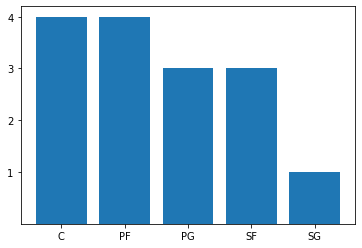

In [3]:
csv_url = "https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv"
df = pd.read_csv(csv_url)

grouped = df.groupby("Pos")
pos = grouped["Pos"].count()

plt.bar([1,2,3,4,5], pos)
plt.xticks([1,2,3,4,5], pos.index)
plt.yticks([1,2,3,4],[1,2,3,4])

plt.show()

In [4]:
pos

Pos
C     4
PF    4
PG    3
SF    3
SG    1
Name: Pos, dtype: int64

In [5]:
pos.index

Index(['C', 'PF', 'PG', 'SF', 'SG'], dtype='object', name='Pos')

In [6]:
df

,No.,Player,Pos,Ht,Wt,Birth Date,College
0,0,Randy Brown,PG,6-2,190,"May 22, 1968","University of Houston, New Mexico State Univer..."
1,30,Jud Buechler,SF,6-6,220,"June 19, 1968",University of Arizona
2,35,Jason Caffey,PF,6-8,255,"June 12, 1973",University of Alabama
3,53,James Edwards,C,7-0,225,"November 22, 1955",University of Washington
4,54,Jack Haley,C,6-10,240,"January 27, 1964","University of California, Los Angeles"
5,9,Ron Harper,PG,6-6,185,"January 20, 1964",Miami University
6,23,Michael Jordan,SG,6-6,195,"February 17, 1963",University of North Carolina
7,25,Steve Kerr,PG,6-3,175,"September 27, 1965",University of Arizona
8,7,Toni Kukoc,SF,6-10,192,"September 18, 1968",NaN
9,13,Luc Longley,C,7-2,265,"January 19, 1969",University of New Mexico


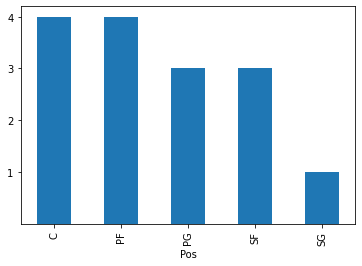

In [7]:
pos.plot.bar()
plt.yticks([1,2,3,4],[1,2,3,4])
plt.show()

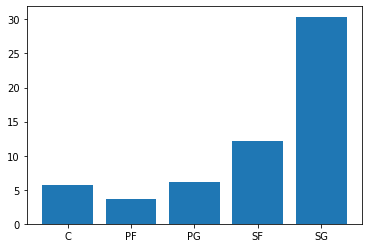

In [17]:
per_game_url = "https://storage.googleapis.com/ds_data_import/stats_per_game_chicago_bulls_1995_1996.csv"
player_info_url = "https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv"
per_game = pd.read_csv(per_game_url)
player_info = pd.read_csv(player_info_url)

df = pd.merge(player_info, per_game[["Name","PTS/G"]], left_on="Player", right_on="Name")
grouped = df.groupby("Pos")
points_per_game = grouped["PTS/G"].mean()

plt.bar([1,2,3,4,5], points_per_game)
plt.xticks([1,2,3,4,5], points_per_game.index)

plt.show()

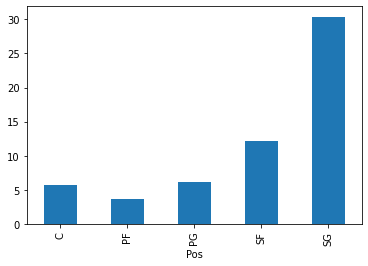

In [18]:
points_per_game.plot.bar()
plt.show()

### distribution

In [20]:
!pip install pyquery

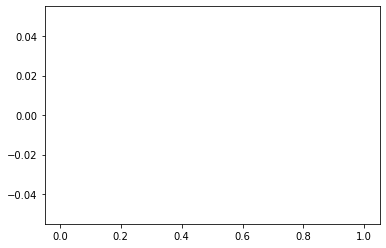

,player,pos,salary


In [24]:
from pyquery import PyQuery as pq
import pandas as pd
import matplotlib.pyplot as plt

def get_nba_sallary():
  """
  Get NBA players' salary from SPOTRAC.COM
  """
  nba_salary_ranking_url = "https://www.spotrac.com/nba/ranings/"
  html_doc = pq(nba_salary_ranking_url)
  
  player_css = ".team-name"
  pos_css = ".rank-position"
  salary_css = ".info"

  players = [p.text for p in html_doc(player_css)]
  positions = [p.text for p in html_doc(pos_css)]
  salaries = [s.text.replace("$", "") for s in html_doc(salary_css)]
  salaries = [int(s.replace(",", "")) for s in salaries]

  df = pd.DataFrame()
  df["player"] = players
  df["pos"] = positions
  df["salary"] = salaries

  return df

nba_salary = get_nba_sallary()
plt.hist(nba_salary["salary"], bins=15)
plt.show()

nba_salary

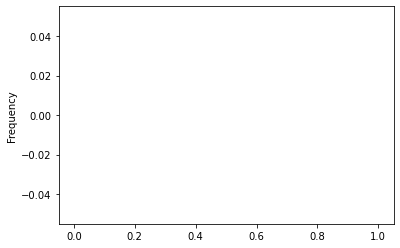

In [25]:
nba_salary["salary"].plot.hist(bins=15)
plt.show()

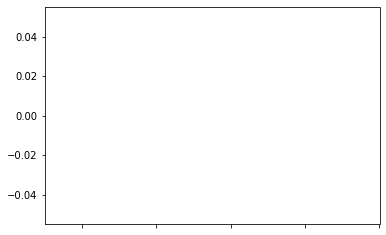

In [27]:
box_df = nba_salary.pivot(index='player', columns='pos', values='salary')
data_to_plot = [box_df[col].values[~np.isnan(box_df[col].values)] for col in box_df.columns]
plt.boxplot(data_to_plot)
plt.xticks(range(1,6), box_df.columns)
plt.show()

In [28]:
box_df.plot.box()
plt.show()

TypeError: ignored

### scatter plot

In [29]:
from pyquery import PyQuery as pq
from requests import get
import pandas as pd
import matplotlib.pyplot as plt

def get_nba_sallary():
  """
  Get NBA players' salary from SPOTRAC.COM
  """
  nba_salary_ranking_url = "https://www.spotrac.com/nba/ranings/"
  html_doc = pq(nba_salary_ranking_url)
  
  player_css = ".team-name"
  pos_css = ".rank-position"
  salary_css = ".info"

  players = [p.text for p in html_doc(player_css)]
  positions = [p.text for p in html_doc(pos_css)]
  salaries = [s.text.replace("$", "") for s in html_doc(salary_css)]
  salaries = [int(s.replace(",", "")) for s in salaries]

  df = pd.DataFrame()
  df["player"] = players
  df["pos"] = positions
  df["salary"] = salaries

  return df

def get_pts_game():
  """
  Get NBA players' PTS/G from NBA.com
  """

  nba_stats_url = "https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=PerGame&Scope=S&Season=2017-18&SeasonType=Regular+Season&StatCategory=PTS"
  pts_game_dict = get(nba_stats_url).json()

  players = [pts_game_dict["resultSet"]["rowSet"][i][2] for i in range(len(pts_game_dict["resultSet"]["rowSet"]))] 
  pts_game = [pts_game_dict["resultSet"]["rowSet"][i][22] for i in range(len(pts_game_dict["resultSet"]["rowSet"]))]

  df = pd.DataFrame()
  df["player"] = players
  df["pts_game"] = pts_game

  return df

pts_game = get_pts_game()
pts_game

JSONDecodeError: ignored

In [32]:

nba_stats_url = "https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=PerGame&Scope=S&Season=2017-18&SeasonType=Regular+Season&StatCategory=PTS"
pts_game_text = get(nba_stats_url)

import json
json.loads(pts_game_text.text)

JSONDecodeError: ignored

### line graph


In [38]:
from pyquery import PyQuery as pq
import pandas as pd
import matplotlib.pyplot as plt

def get_pp_stats():
  """
  Get Paul Pierce stats from basketball-reference.com
  """

  stats_url = "https://www.basketball-reference.com/players/p/piercpa01.html"
  html_doc = pq(stats_url)

  pts_css = "#per_game .full_table .right:nth-child(30)"
  ast_css = "#per_game .full_table .right:nth-child(25)"
  reb_css = "#per_game .full_table .right:nth-child(24)"

  year = [str(i)+"-01-01" for i in range(1999,2018)]
  pts = [float(p.text) for p in html_doc(pts_css)]
  ast = [float(a.text) for a in html_doc(ast_css)]
  reb = [float(r.text) for r in html_doc(reb_css)]

  df = pd.DataFrame()
  df["year"] = year
  df["pts"] = pts
  df["ast"] = ast
  df["reb"] = reb

  return df

pp_stats = get_pp_stats()
pp_stats  

,year,pts,ast,reb
0,1999-01-01,16.5,2.4,6.4
1,2000-01-01,19.5,3.0,5.4
2,2001-01-01,25.3,3.1,6.4
3,2002-01-01,26.1,3.2,6.9
4,2003-01-01,25.9,4.4,7.3
5,2004-01-01,23.0,5.1,6.5
6,2005-01-01,21.6,4.2,6.6
7,2006-01-01,26.8,4.7,6.7
8,2007-01-01,25.0,4.1,5.9
9,2008-01-01,19.6,4.5,5.1


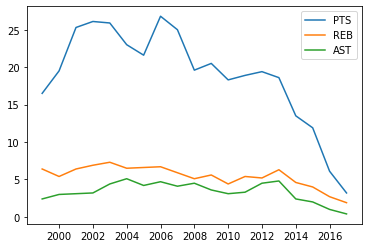

In [39]:
pp_stats["year"] = pd.to_datetime(pp_stats["year"])
pp_stats = pp_stats.set_index("year")

plt.plot(pp_stats["pts"])
plt.plot(pp_stats["reb"])
plt.plot(pp_stats["ast"])

plt.legend(["PTS","REB","AST"], loc='upper right')
plt.show()

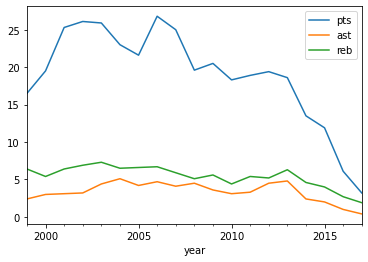

In [36]:
pp_stats.plot.line()
plt.show()

In [14]:
(-80538738812075974)**3 + (80435758145817515)**3 +  (12602123297335631)**3

42

In [11]:
(80435758145817515)**3

520412211582497361738652718463552780369306583065875

In [12]:
(12602123297335631)**3

2001387454481788542313426390100466780457779044591

In [13]:
(-80538738812075974)**3

-522413599036979150280966144853653247149764362110424